**Submetric #1: Dogs in Pittsburgh**
*Rachel Jan*

For this submetric, I examined the dataset of 2024 dog liscenses registered in Allegheny County. 

Dog liscense registration can be a good indicator of how "good" a neighborhood is for several reasons. 
1. Dog ownership can foster a sense of community. A neighborhood with more responsible dog owners might be a friendlier community connected through their dogs. 
2. Higher dog liscense rates suggest that residents in the neighborhood are responsible pet owners who comply with local regulations. This can correlate with other responsible behaviors such as proper pet care, vaccination, leash laws compliance, and cleaning up after dogs - all of which can ensure the safety, cleanliness, and comfort of a neighborhood. 
3. A neighborhood with more liscensed dogs may be better equipped to provide a comfortable and supportive environment for owners and their pets, such as having nearby dog parks, pet-friendly businesses, or green space. 

With my chosen dataset, I can associate a certain liscense with a neighborhood by looking at the owner's zipcode. 
Chosen Dataset: https://data.wprdc.org/dataset/allegheny-county-dog-licenses/resource/ecedb5a4-4e9d-469b-8cde-2673ee48c482

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("DogLicense2024.csv")
dictionary = {}
zip_codes = set()

First, lets visualize our data

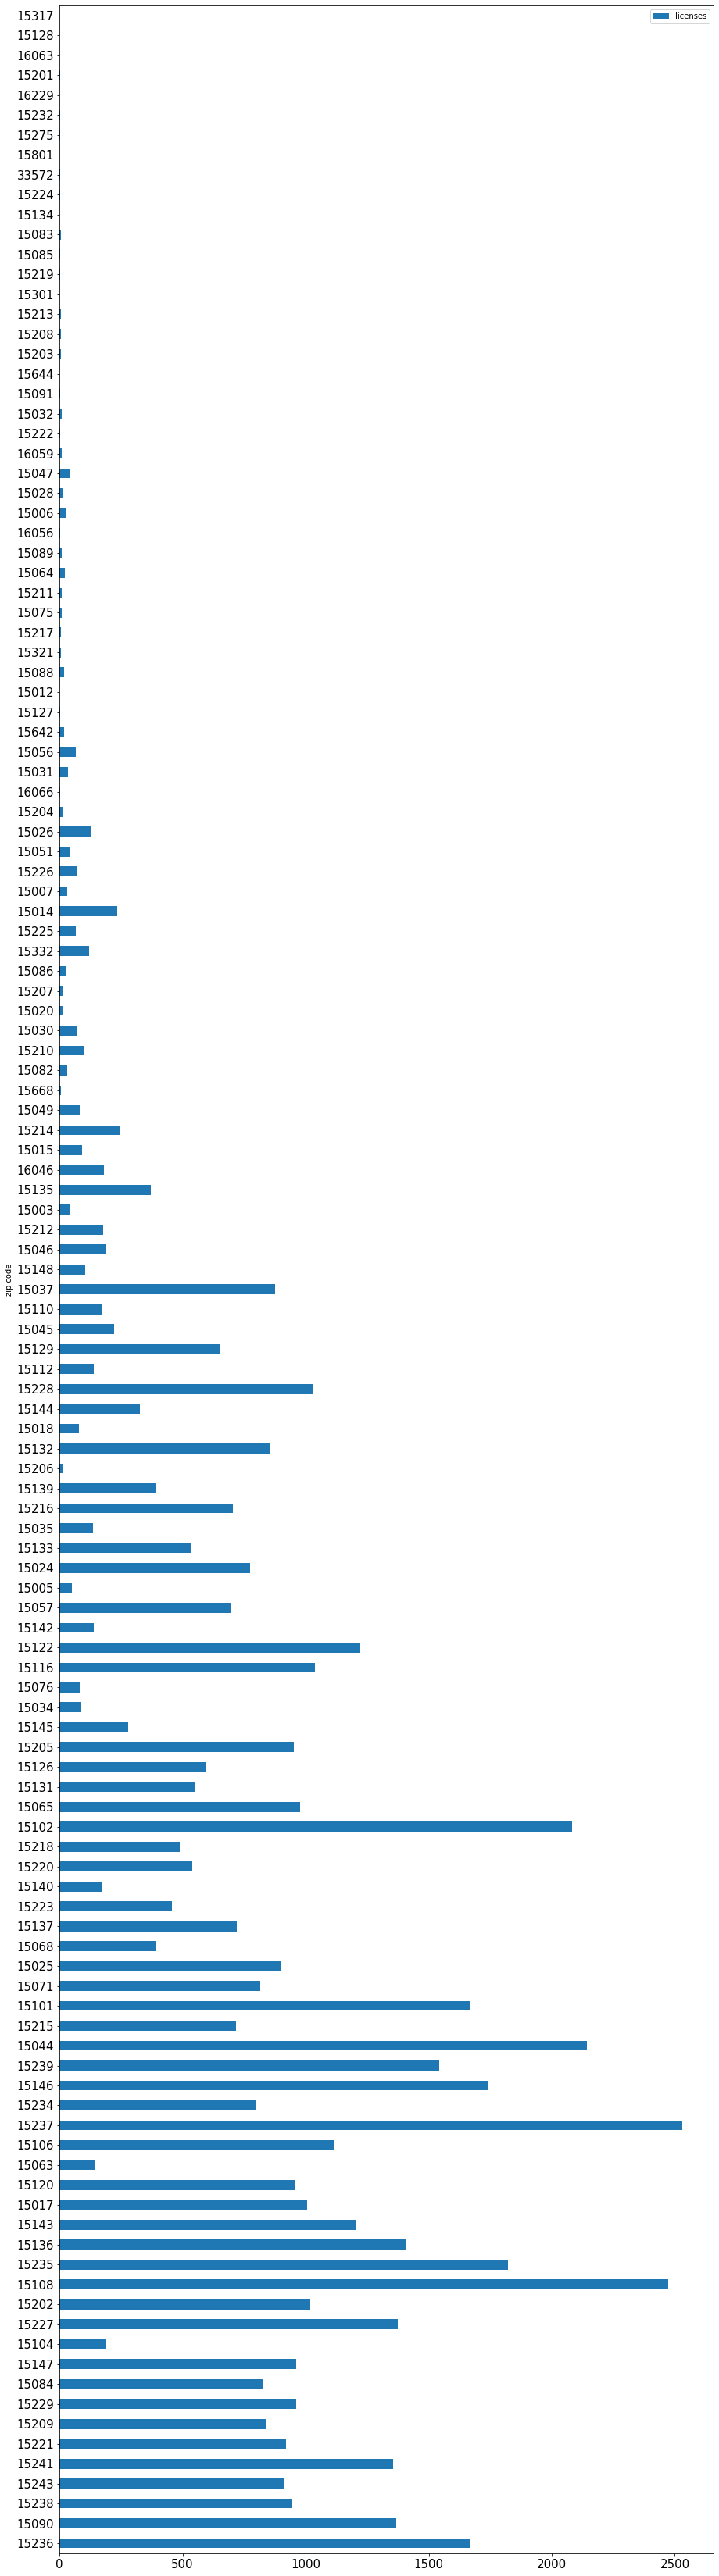

In [2]:
for index, row in data.iterrows():
    zip_codes.add(row.OwnerZip)
    if row.OwnerZip not in dictionary:
        dictionary[row.OwnerZip] = 1
    else:
        dictionary[row.OwnerZip] += 1
        
final = pd.DataFrame(dictionary.items(), columns=['zip code', 'licenses'])
final.head()

final.plot(kind = 'barh', x = 'zip code', y = 'licenses', figsize=(15,60), fontsize = 15)

Now, lets associate each zipcode with a neighborhood using Allegheny County's Zip Code Boundaries dataset

In [5]:
zipcodes = pd.read_csv("zipcodes.csv")
zipcode_dict = {}

for index, row in zipcodes.iterrows():
    zipcode_dict[row.zip] = row['name']

In [13]:
new_dict = {}
for key, item in dictionary.items():
    if key in zipcode_dict:
        if zipcode_dict[key] in new_dict:
            new_dict[zipcode_dict[key]] += item
        else: 
            new_dict[zipcode_dict[key]] = item
    else:
        new_dict[key] = item

sorted_dict = dict(sorted(new_dict.items(), key=lambda item: item[1], reverse=True))
sorted_dict

{'MCKNIGHT': 2531,
 'CORAOPOLIS': 2472,
 'MCKEESPORT': 2311,
 'GIBSONIA': 2144,
 'BETHEL PARK': 2084,
 'PENN HILLS': 1823,
 'MONROEVILLE': 1740,
 'ALLISON PARK': 1671,
 'BALDWIN': 1667,
 'PLUM CREEK': 1543,
 'PITTSBURGH': 1419,
 'MCKEES ROCKS': 1406,
 'BRENTWOOD': 1374,
 'WEXFORD': 1368,
 'WEST MIFFLIN': 1222,
 'SEWICKLEY': 1206,
 'CARNEGIE': 1115,
 'GLENSHAW': 1038,
 'MOUNT LEBANON': 1030,
 'BELLEVUE': 1019,
 'BRIDGEVILLE': 1006,
 'NATRONA HEIGHTS ': 977,
 'WEST VIEW': 963,
 'VERONA': 961,
 'HOMESTEAD': 955,
 'THORNBURG': 952,
 'FOX CHAPEL': 946,
 'WILKINSBURG': 919,
 'CEDARHURST': 910,
 'CLAIRTON': 899,
 'ELIZABETH': 875,
 'ROSS TOWNSHIP': 841,
 'TARENTUM': 826,
 'OAKDALE': 817,
 'CASTLE SHANNON': 797,
 'CHESWICK': 776,
 'NORTH VERSAILLES': 719,
 "O'HARA": 718,
 'DORMONT': 706,
 'MCDONALD': 695,
 'SOUTH PARK': 653,
 'IMPERIAL': 593,
 'GREEN TREE': 539,
 'SWISSVALE': 489,
 'ETNA': 457,
 'NEW KENSINGTON': 392,
 'OAKMONT': 390,
 'SPRINGDALE': 328,
 'TURTLE CREEK': 279,
 'SUMMER HILL': 2

From this, we can tell that the top ten neighborhoods with the most dog licenses are: 

1. McKnight
2. Coraopolis
3. McKeesport
4. Gibsonia
5. Bethel Park
6. Penn Hills
7. Monroeville
8. Allison Park
9. Baldwin
10. Plum Creek